Notebook to look at New NEMO 3.6 Tidal Runs

In [1]:
%matplotlib inline
from matplotlib import pylab
import matplotlib.pyplot as plt
import netCDF4 as NC
import numpy as np
from salishsea_tools import nc_tools
from salishsea_tools import viz_tools
from salishsea_tools import tidetools
 

In [2]:
# Point Atkinson
PA_1 = NC.Dataset('../../myResults/NEMO36_Tides/base_run/E1/PointAtkinson_0000.nc')
PA_2 = NC.Dataset('../../myResults/NEMO36_Tides/base_run/E2/PointAtkinson_0000.nc')
PA_3 = NC.Dataset('../../myResults/NEMO36_Tides/base_run/E3/PointAtkinson_0000.nc')
PA_4 = NC.Dataset('../../myResults/NEMO36_Tides/base_run/E4/PointAtkinson_0000.nc')
PA_5 = NC.Dataset('../../myResults/NEMO36_Tides/base_run/E5/PointAtkinson_0000.nc')
old_PA = NC.Dataset('../../myResults/oldtopog/PointAtkinson.nc')
log_PA_1 = NC.Dataset('../../myResults/NEMO36_Tides/second_log/E1/PointAtkinson_0000.nc')
log_PA_2 = NC.Dataset('../../myResults/NEMO36_Tides/second_log/E2/PointAtkinson_0000.nc')
strong_log_PA_1 = NC.Dataset('../../myResults/NEMO36_Tides/stronglog/E1/PointAtkinson_0000.nc')

In [3]:
# Port Renfrew
PR_1 = NC.Dataset('../../myResults/NEMO36_Tides/base_run/E1/PortRenfrew_0000.nc')
PR_2 = NC.Dataset('../../myResults/NEMO36_Tides/base_run/E2/PortRenfrew_0000.nc')
PR_3 = NC.Dataset('../../myResults/NEMO36_Tides/base_run/E3/PortRenfrew_0000.nc')
PR_4 = NC.Dataset('../../myResults/NEMO36_Tides/base_run/E4/PortRenfrew_0000.nc')
PR_5 = NC.Dataset('../../myResults/NEMO36_Tides/base_run/E5/PortRenfrew_0000.nc')
old_PR = NC.Dataset('../../myResults/oldtopog/PortRenfrew.nc')
log_PR_1 = NC.Dataset('../../myResults/NEMO36_Tides/second_log/E1/PortRenfrew_0000.nc')
log_PR_2 = NC.Dataset('../../myResults/NEMO36_Tides/second_log/E2/PortRenfrew_0000.nc')
strong_log_PR_1 = NC.Dataset('../../myResults/NEMO36_Tides/stronglog/E1/PortRenfrew_0000.nc')

In [ ]:
# Check Dimensions
nc_tools.show_dimensions(PA_1)

In [ ]:
# Check Variables
nc_tools.show_variables(PA_1)

# Point Atkinson

In [6]:
SSH = PA_1.variables['sossheig'][:]
SSH = np.append(SSH, PA_2.variables['sossheig'][:])
SSH = np.append(SSH, PA_3.variables['sossheig'][:])
SSH = np.append(SSH, PA_4.variables['sossheig'][:])
print SSH.shape
SSH = np.append(SSH, PA_5.variables['sossheig'][:])
print SSH.shape
oldSSH = old_PA.variables['sossheig'][:]
log_SSH = log_PA_1.variables['sossheig'][:]
log_SSH = np.append(log_SSH, log_PA_2.variables['sossheig'][:])
strong_log_SSH = strong_log_PA_1.variables['sossheig'][:]
print oldSSH.shape

(1200,)
(1920,)
(3840, 1, 1)


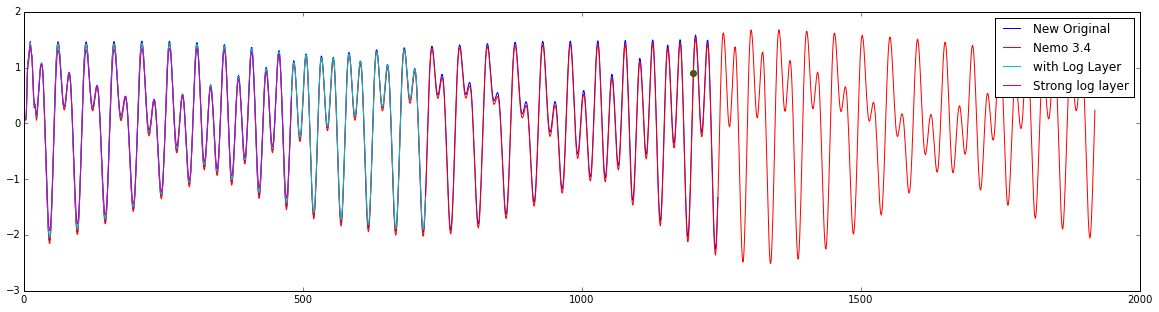

In [7]:
length = SSH.shape[0]
plt.figure(figsize=(20,5))
plt.plot(np.arange(0.5,length,1),SSH, label='New Original')
plt.plot(1200-1, SSH[1200-1],'o')
plt.plot(np.arange(0.25,length,1),oldSSH[:length*2:2,0,0], label="Nemo 3.4")
plt.plot(np.arange(0.5,log_SSH.shape[0],1), log_SSH, label = "with Log Layer")
plt.plot(np.arange(0.5,strong_log_SSH.shape[0],1), strong_log_SSH[:,0,0],label = "Strong log layer")
plt.legend()

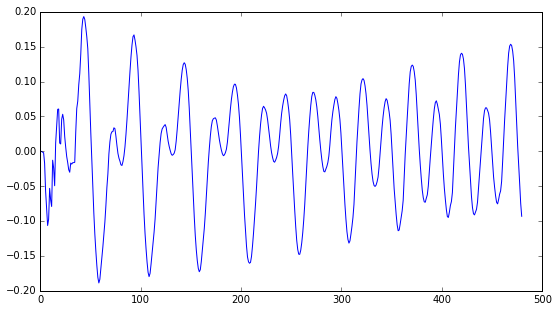

In [65]:
diffPA = strong_log_SSH[:,0,0]-SSH[:strong_log_SSH.shape[0]]
plt.figure(figsize=(9,5))
plt.plot(np.arange(0.5,strong_log_SSH.shape[0],1), diffPA)

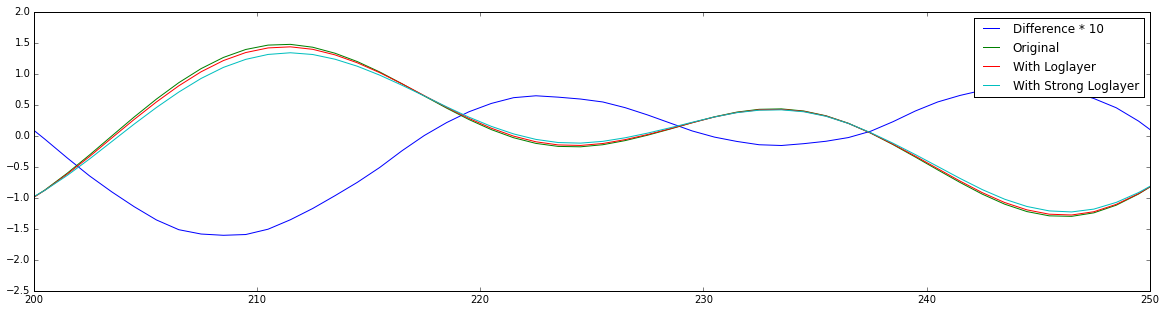

In [67]:
plt.figure(figsize=(20,5))
plt.xlim((200,250))
plt.plot(np.arange(0.5,strong_log_SSH.shape[0],1), diffPA*10., label = "Difference * 10")
plt.plot(np.arange(0.5,length,1),SSH, label = 'Original')
plt.plot(np.arange(0.5,log_SSH.shape[0],1), log_SSH, label ='With Loglayer')
plt.plot(np.arange(0.5,strong_log_SSH.shape[0],1), strong_log_SSH[:,0,0], label ='With Strong Loglayer')
plt.legend()

# Port Renfrew

In [71]:
SSH = PR_1.variables['sossheig'][:]
SSH = np.append(SSH, PR_2.variables['sossheig'][:])
SSH = np.append(SSH, PR_3.variables['sossheig'][:])
SSH = np.append(SSH, PR_4.variables['sossheig'][:])
print SSH.shape
oldSSH = old_PR.variables['sossheig'][:]
log_SSH = log_PR_1.variables['sossheig'][:]
log_SSH = np.append(log_SSH, log_PR_2.variables['sossheig'][:])
strong_log_SSH = strong_log_PR_1.variables['sossheig'][:]
print oldSSH.shape

(1200,)
(3840, 1, 1)


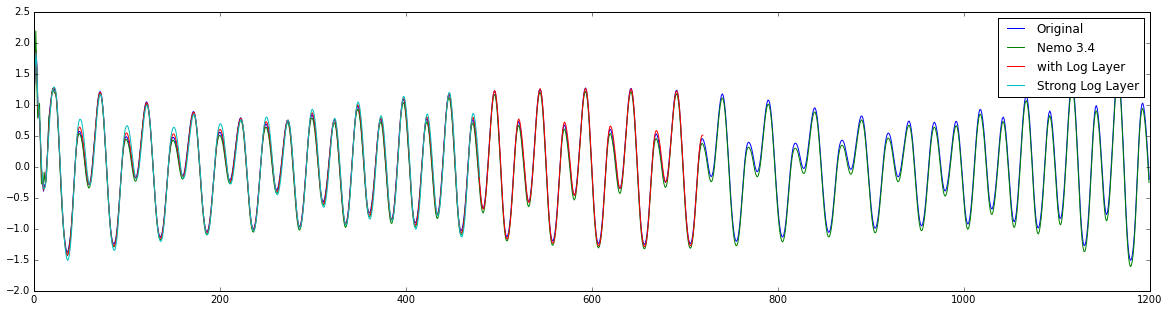

In [74]:
length = SSH.shape[0]
plt.figure(figsize=(20,5))
plt.plot(np.arange(0.5,length,1),SSH, label="Original")
plt.plot(np.arange(0.25,length,1),oldSSH[:length*2:2,0,0], label="Nemo 3.4")
plt.plot(np.arange(0.5,log_SSH.shape[0],1), log_SSH, label="with Log Layer")
plt.plot(np.arange(0.5,strong_log_SSH.shape[0],1), strong_log_SSH[:,0,0], label="Strong Log Layer")
plt.legend()

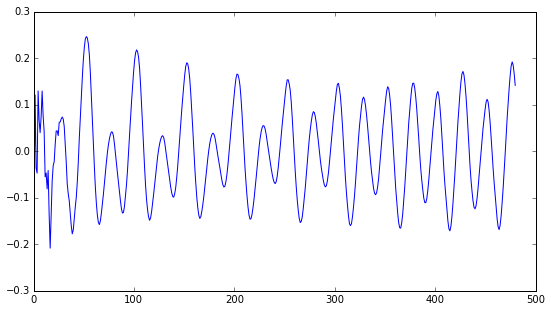

In [51]:
diffPR = strong_log_SSH[:,0,0]-SSH[:strong_log_SSH.shape[0]]
plt.figure(figsize=(9,5))
plt.plot(np.arange(0.5,strong_log_SSH.shape[0],1), diffPR)

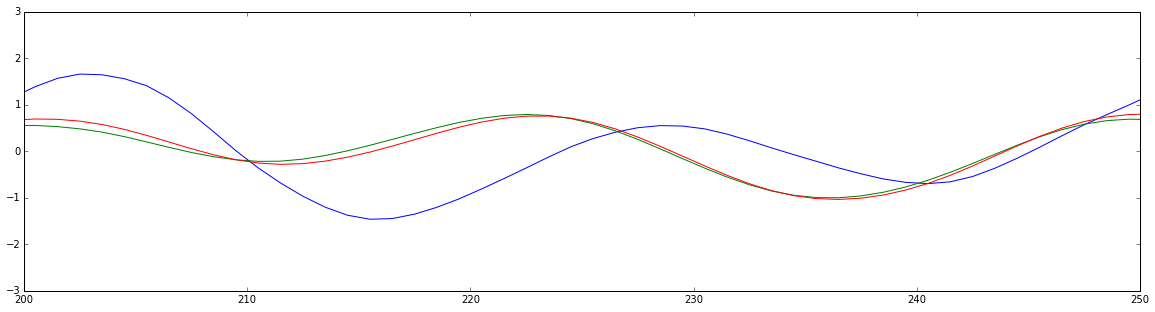

In [52]:
plt.figure(figsize=(20,5))
plt.xlim((200,250))
plt.plot(np.arange(0.5,strong_log_SSH.shape[0],1), diffPR*10.)
plt.plot(np.arange(0.5,length,1),SSH)
plt.plot(np.arange(0.5,strong_log_SSH.shape[0],1), strong_log_SSH[:,0,0])

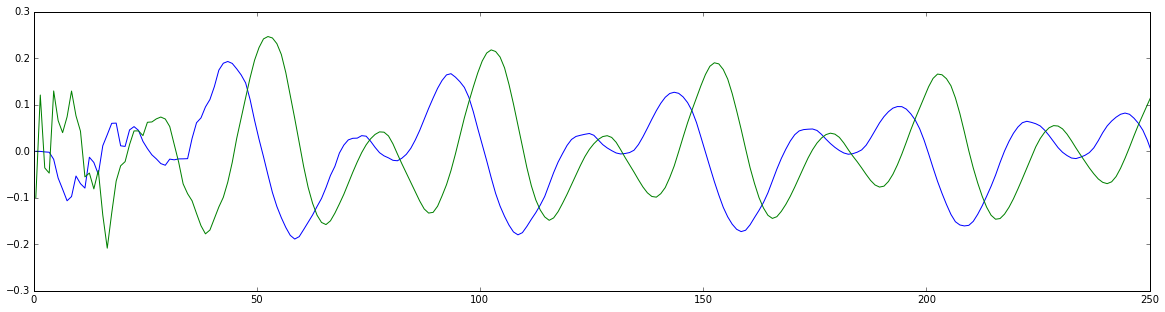

In [53]:
plt.figure(figsize=(20,5))
plt.xlim((0,250))
plt.plot(np.arange(0.5,strong_log_SSH.shape[0],1), diffPA)
plt.plot(np.arange(0.5,strong_log_SSH.shape[0],1), diffPR)